In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 1.Load the Dataset

In [2]:
df = pd.read_csv("Visit_Data.csv")
print(df.head(15))

    Unnamed:0  visits  gender   age  salary_income  illness  reduced  health  \
0           0       1  female  0.19           0.55        1        4       1   
1           1       8  female  0.19           0.45        1        2       1   
2           2       8    male  0.19           0.90        3        0       0   
3           3       2    male  0.23           0.15        1        0       0   
4           4       9    male  0.19           0.45        2        5       1   
5           5       4  female  0.19           0.35        5        1       9   
6           6       6  female  0.18           0.55        4        0       2   
7           7       5  female  0.19           0.15        3        0       6   
8           8       7  female  0.19           0.65        2        0       5   
9           9       9    male  0.17           0.15        1        0       0   
10         10      10    male  0.19           0.45        1        0       0   
11         11       6    male  0.22     


# 2. Display complete Information about the columns of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed:0      15 non-null     int64  
 1   visits         15 non-null     int64  
 2   gender         15 non-null     object 
 3   age            15 non-null     float64
 4   salary_income  15 non-null     float64
 5   illness        15 non-null     int64  
 6   reduced        15 non-null     int64  
 7   health         15 non-null     int64  
 8   private        15 non-null     object 
 9   freepoor       15 non-null     object 
 10  freerepat      15 non-null     object 
 11  nchronic       15 non-null     object 
 12  Ichronicc      15 non-null     object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ KB


# 3. Find out the Total No. of People based on their count of illness

In [4]:
df["illness"].value_counts()


1    5
3    4
2    3
4    2
5    1
Name: illness, dtype: int64

# 4. Visualize and Analyze Maximum, Minimum and Medium Income

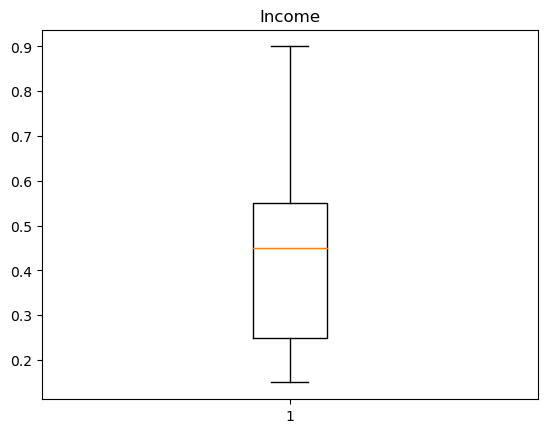

In [5]:
y = list(df.salary_income)
plt.boxplot(y)
plt.title("Income")
plt.show()


# 5. Find out the no of days of Reduced Activity of male and females due to illness

In [6]:
df.groupby(['gender','reduced']).mean()

Unnamed:0  visits       age  salary_income  illness    health
gender reduced                                                               
female 0              7.0     6.0  0.186667           0.45      3.0  4.333333
       1              5.0     4.0  0.190000           0.35      5.0  9.000000
       2              1.0     8.0  0.190000           0.45      1.0  1.000000
       4              0.0     1.0  0.190000           0.55      1.0  1.000000
male   0              7.0     7.0  0.200000           0.38      1.6  0.400000
       1             14.0     7.0  0.190000           0.25      3.0  0.000000
       5              4.0     9.0  0.190000           0.45      2.0  1.000000
       7             13.0    13.0  0.190000           0.45      4.0  6.000000
       13            12.0     2.0  0.190000           0.55      3.0  1.000000

# 6. Visualize is there any missing values in the dataset based on heat map

<AxesSubplot:>

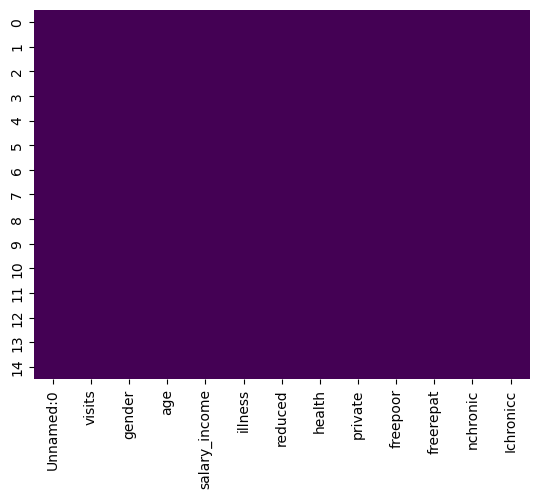

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# 7. Find out the Correlation between variables and Different variables in the given Dataset 

<AxesSubplot:>

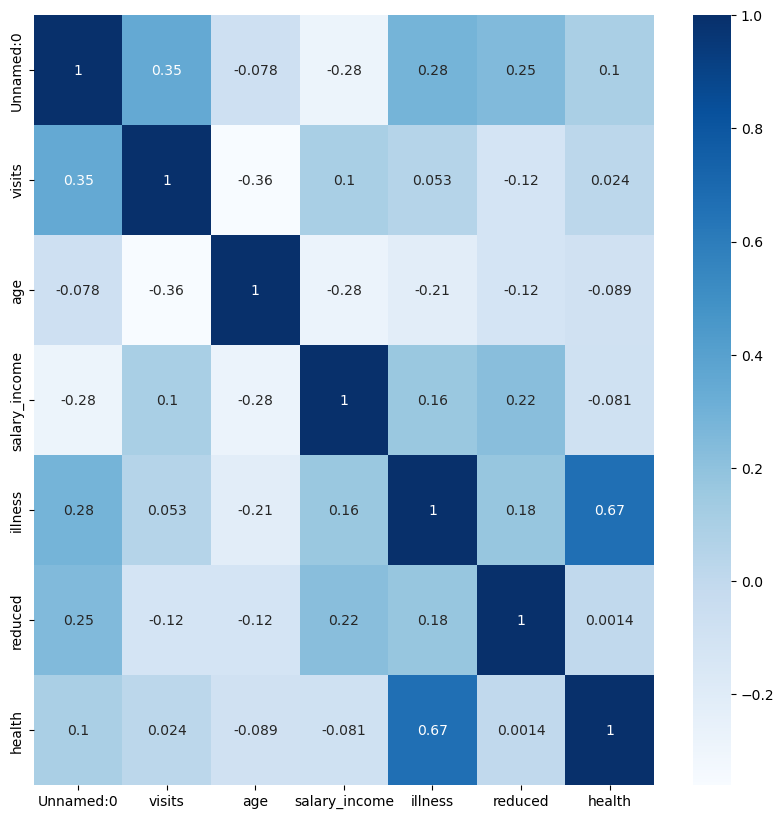

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# 8. Analyse How the income of a patient that effects the no of visits to the Hospital

Text(0, 0.5, 'Visits')

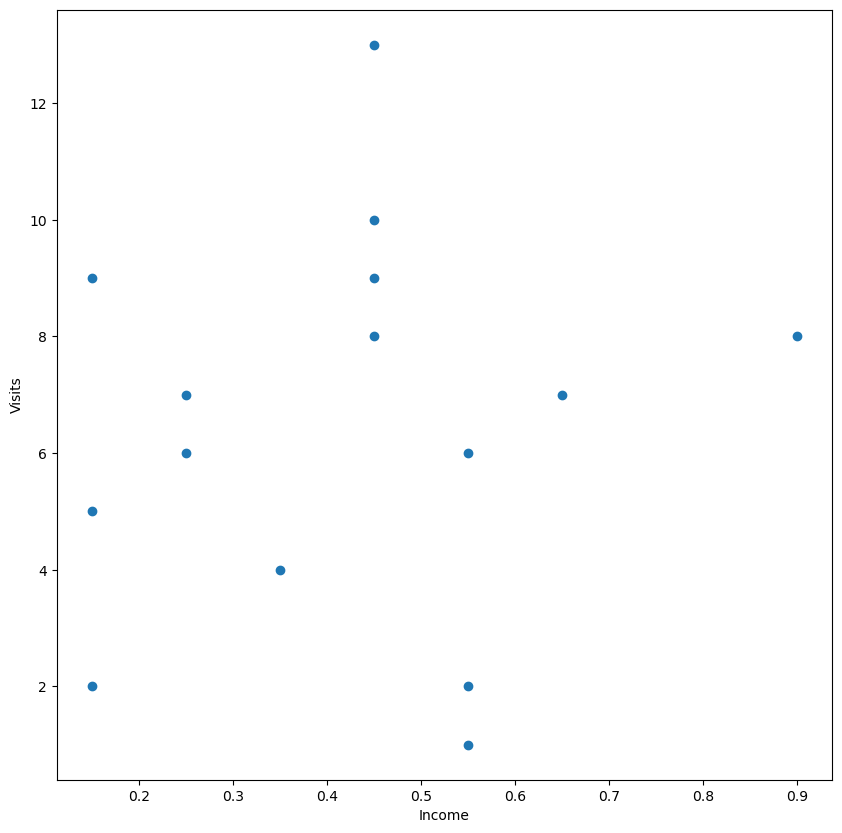

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x='salary_income',y='visits',data=df)
plt.xlabel('Income')
plt.ylabel('Visits')

# 9. Count and Visualize the no of males and females affected by illness 

<AxesSubplot:xlabel='gender', ylabel='Count'>

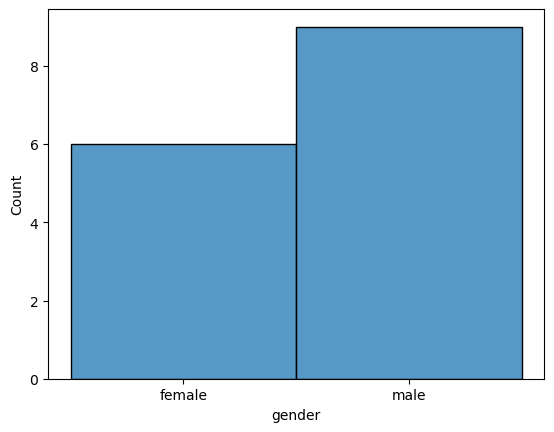

In [10]:
sns.histplot(df.gender,bins=2)

# 10. Visualize the Percentage of people getting Govt Health Insurance due to low income, due to old age and also the percentage of people having Private Health Insurance

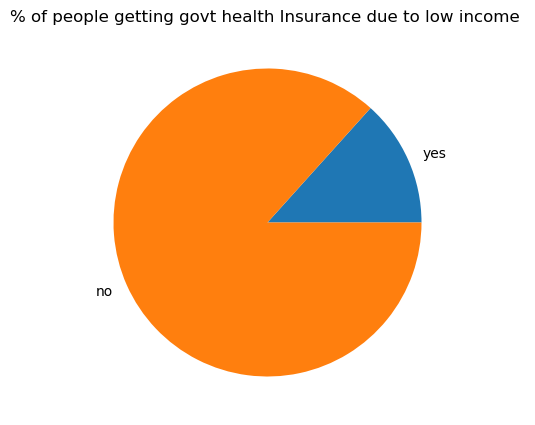

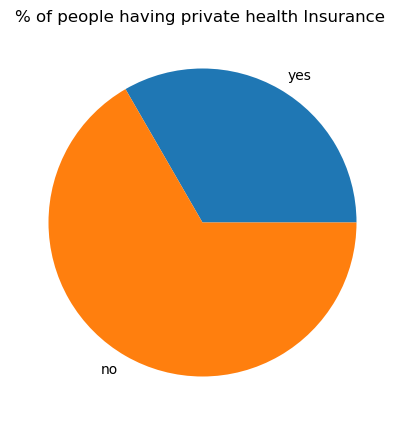

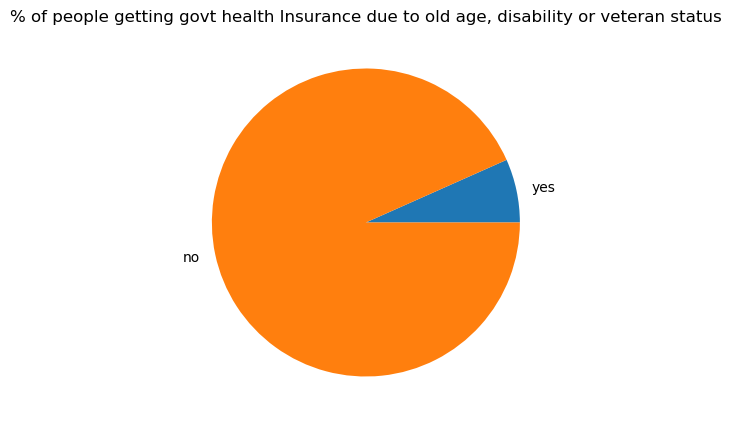

In [11]:
# % of people getting govt Insurance due to Low income
label=['yes', 'no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("% of people getting govt health Insurance due to low income ")
plt.show()
#% of people having private Insurance
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("% of people having private health Insurance ")
plt.show()
#% of people getting govt Insurance due to old age, disability or veteran status
Y = df[df['freerepat']=='yes'] 
N = df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("% of people getting govt health Insurance due to old age, disability or veteran status")
plt.show()

# 11. Plot a Horizontal Bar Chart to analyze the reduced days of activity due to illness based on gender

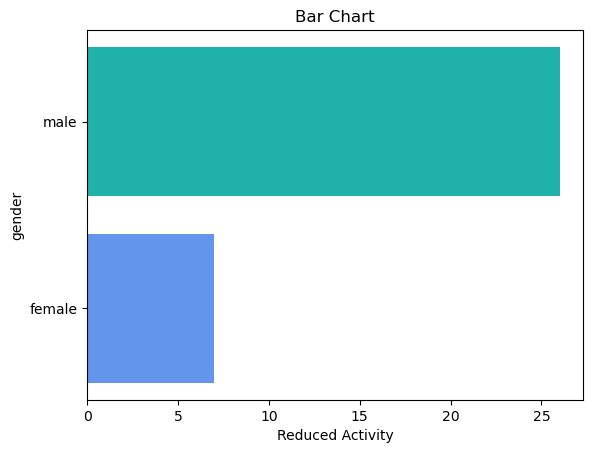

In [12]:
db= df.groupby('gender')['reduced'].sum().to_frame().reset_index()
#Creating the bar chart
plt.barh(db['gender'], db['reduced'], color = ['cornflowerblue', 'lightseagreen'])
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('Reduced Activity')
plt.ylabel('gender')
#Show the plot
plt.show()

# 12. Histograms

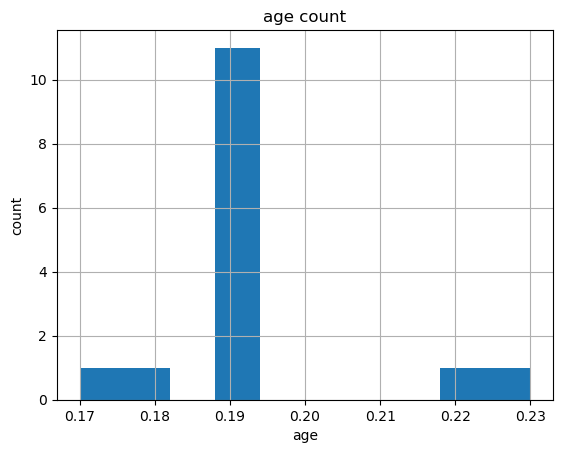

In [16]:
df['age'].hist()
plt.xlabel('age')
plt.ylabel('count')
plt.title('age count')
plt.show()

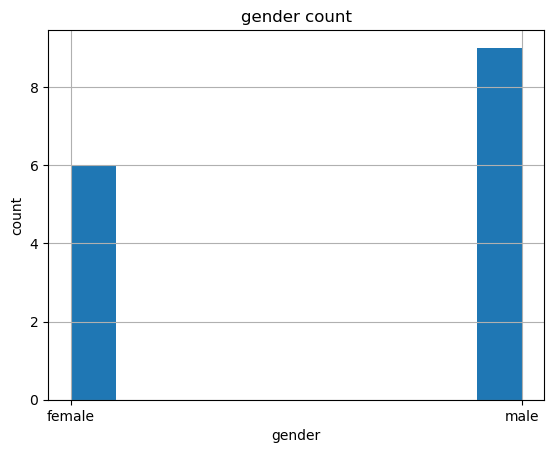

In [17]:
df['gender'].hist()
plt.xlabel('gender')
plt.ylabel('count')
plt.title('gender count')
plt.show()